In [2]:
# General informations that would be used for the rest of the notetaking

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors
from IPython.display import HTML

plt.ioff() # isso é p n ficar mostrando as figuras sem eu querer
 
plt.rcParams["mathtext.fontset"] = "cm" # Fonte matemática pro latex
plt.rc('font', family='serif') # fonte tipo serif, p fica paredico com latex msm
plt.rc('text', usetex=False) # esse vc deixa True e for salvar em pdf e False se for p salvar png

rgb_light =  ['#ce5825','#2e9a60','#6182e2']
rgb_pallet = ['#cd4100','#007148','#4169E1']
rgb_darker = ['#9e3000','#005738','#304ea6']

cym_light =  ['#82e7ff','#fde974','#ff98ff']
cym_pallet = ['#00ceff','#ffd700','#ff6dff']
cym_pallet = ['#007a96','#b39700','#b04bb0']

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", [rgb_pallet[2],"white",rgb_pallet[0]])
cmap2 = matplotlib.colors.LinearSegmentedColormap.from_list("", [rgb_pallet[2],"black",rgb_pallet[0]])



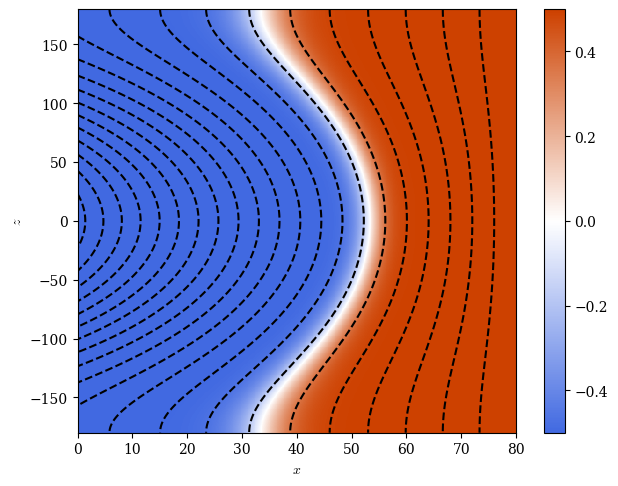

In [33]:
# Reproduçao de uma figura do artigo "Double-reconnected magnetic structures driven by Kelvin-Helmholtz vortices at the Eath's magnetosphere"

def A(x,z,Lx,Lz):
    return (4/5)*(x-Lx) + (Lz/(10*np.pi))*np.sinh(2*np.pi*(x - Lx)/Lz)*np.cos(2*np.pi*z/Lz)

def Ueq(A,Leq,Lgs):
    return 0.5*np.tanh((A-Lgs)/Leq)




x = np.linspace(0,80,500)
z = np.linspace(-180,+180,500)
xx , zz = np.meshgrid(x,z)


Lx = 80
Lz = 360
Leq = 12/5 + (3/5)*np.cosh(2*np.pi*Lx/(3*Lz))

Lgs = -4*Lx/15 + (-Lz/(10*np.pi))*np.sinh(2*np.pi*Lx/(3*Lz))
Af = A(xx,zz,80,360)
Ueqf = Ueq(Af,Leq,Lgs)


fig, ax = plt.subplots()
fig.set_size_inches(18*0.393, 14*0.393) # diminuir na metade p 
ax.set_ylabel("$z$")
ax.set_xlabel("$x$")
axisplot2  = ax.pcolormesh(xx,zz,Ueqf, vmin = -0.5, vmax= 0.5, cmap=cmap)
axisplot  = ax.contour(xx,zz,Af, levels = 25, colors = "#000000")
plt.colorbar(axisplot2)
plt.show()

## $\nabla \times F$
$$\nabla \times \mathbf {F} ={\begin{vmatrix}{\boldsymbol {\hat {\imath }}}&{\boldsymbol {\hat {\jmath }}}&{\boldsymbol {\hat {k}}}\\[5pt]{\dfrac {\partial }{\partial x}}&{\dfrac {\partial }{\partial y}}&{\dfrac {\partial }{\partial z}}\\[10pt]F_{x}&F_{y}&F_{z}\end{vmatrix}}$$

Ou ainda

$$\nabla \times \mathbf {F} =\left({\frac {\partial F_{z}}{\partial y}}-{\frac {\partial F_{y}}{\partial z}}\right){\boldsymbol {\hat {\imath }}}+\left({\frac {\partial F_{x}}{\partial z}}-{\frac {\partial F_{z}}{\partial x}}\right){\boldsymbol {\hat {\jmath }}}+\left({\frac {\partial F_{y}}{\partial x}}-{\frac {\partial F_{x}}{\partial y}}\right){\boldsymbol {\hat {k}}}={\begin{bmatrix}{\frac {\partial F_{z}}{\partial y}}-{\frac {\partial F_{y}}{\partial z}}\\{\frac {\partial F_{x}}{\partial z}}-{\frac {\partial F_{z}}{\partial x}}\\{\frac {\partial F_{y}}{\partial x}}-{\frac {\partial F_{x}}{\partial y}}\end{bmatrix}}$$

Num caso particular no qual $F_z$ = 0, $F_x = F_x(x,y)$ e $F_y = F_y(x,y)$

$$\nabla \times \mathbf {F} =\left({\frac {\partial F_{y}}{\partial x}}-{\frac {\partial F_{x}}{\partial y}}\right){\boldsymbol {\hat {k}}}$$

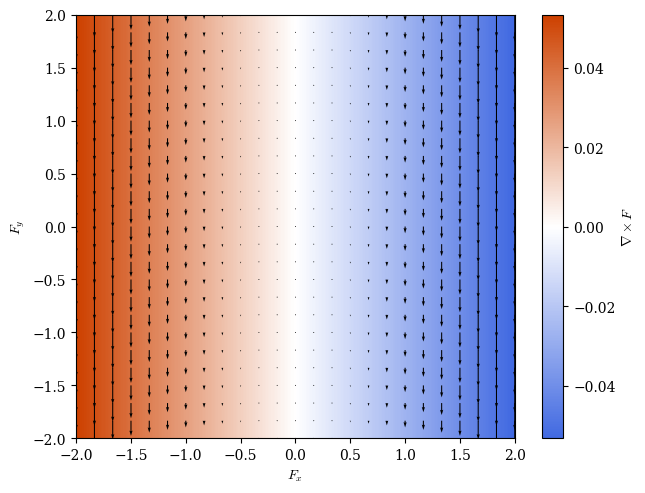

In [35]:
## Funçao para o calculo do rotacional discreto, dado um campo vetorial vx e vy, figura referencia o exemplo do wikipedia

def curl(vx,vy):
    parxy = np.gradient(vx,axis = 1)
    paryx = np.gradient(vy,axis = 1)
    return paryx-parxy



x = np.linspace(-2,2,25)
y = np.linspace(-2,2,25)

xx, yy = np.meshgrid(x,y)

vx = yy*0
vy = -(xx*xx)

vxm = yym*0
vym = -(xxm*xxm)


xm = np.linspace(-2,2,300)
ym = np.linspace(-2,2,300)
xxm, yym = np.meshgrid(xm,ym)
vxm = yym*0
vym = -(xxm*xxm)



#print(curl(vx,vy))

fig, ax = plt.subplots()
fig.set_size_inches(18*0.393, 14*0.393) # diminuir na metade p 
ax.set_xlabel("$F_x$")
ax.set_ylabel("$F_y$")

axmesh = ax.pcolormesh(xxm,yym,curl(vxm,vym), cmap = cmap)
ax.quiver(xx,yy,vx,vy)

plt.colorbar(axmesh, label = r'$\nabla \times F$')

plt.show()